# Machine Learning Project, Project Title: Amazon Employee Access challenge.

# Students in the Team: 
#Akhil Kumar Dundigalla, akd389.
#Sravan Reddy Chintareddy, src572
#Sridhar Gadicherla, sg5764

### ** Project Definition:  When any employee at any company starts to work, they want to obtain the complete computer access necessary to fulfill their role. This access may allow an employee to manipulate resources according to his needs. But often many employees figure out that their access is restricted to certain applications. A supervisor then manually gives the required access to the employee in order to overcome access obstacles which takes a lot of time. As employees move throughout a company, this manual procedure wastes a nontrivial amount of time and money. There is enough amount of data regarding an employee’s role within an organization and the resources to which they have access. Given this data, models can be built that automatically determine whether access privileges can be given to an employee or not.

###**Our proposed solution:  Our objective is to build a classification model, learned using historical data provided by amazon and available from Kaggle competitions, that will determine whether an employee should be given access or not. Since it is a classification problem we will first try to use Linear classifiers (SVM, Logistic Regression) and measure the performance using Accuracy or ROC-AUC. If the performance is not up to the mark then we will try to use RandomForest classifier. We will use the best model we can come up with and use it to predict what is required and measure its performance using ROC-AUC.**

**Note: ***  If you want to run our code please run it on google colab, because we have run our code on google colab and ipynb file downloaded from google colab has indentation problem when opened and runned using jupyter notebook. Also some of our code cells containing gridsearchcv code takes 2 to 3 hours to run when run using goggle colab gpu. So instead of running those code cells, we have taken the screenshots of that particular code cells and its respective outputs and posted it on github just to avoid running those code cells.

In [0]:
import numpy as np
from sklearn.preprocessing import StandardScaler, scale, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve, auc, classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


%matplotlib inline

In [0]:
df1 = pd.read_csv('train.csv')

In [0]:
df = df1.dropna()
df.head(5)

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [0]:
df.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


Fom above df.describe( ) table we can see that the mean of the Target column 'ACTION' is 0.942, which tells us that the input data is really skewed. That contains 94% of examples belonging to class 1 and only 6% belongs to class 0. Since the data is skewed, accuracy metric will mislead us, hence we used AUC(area under curve) metric for all the models we used to predict the labels.

**To illustrate how skewed the data is we will plot the histogram of target column : 'ACTION'. We can see that the number of data examples belonging to class 1 is way more than class 0. We can see the plot below.**

1    30872
0     1897
Name: ACTION, dtype: int64

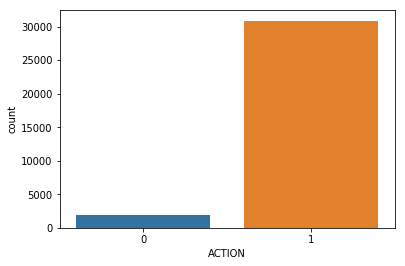

In [0]:
sns.countplot(x="ACTION", data=df)
df.loc[:,'ACTION'].value_counts()

Now dropping the unwanted columns.

In [0]:
y = np.array(df['ACTION'])

# dropping Target column and ROLE_CODE column.
df=df.drop(['ACTION','ROLE_CODE'],axis=1)
df.shape

(32769, 8)

In [0]:
df.head(6)

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY
0,39353,85475,117961,118300,123472,117905,117906,290919
1,17183,1540,117961,118343,123125,118536,118536,308574
2,36724,14457,118219,118220,117884,117879,267952,19721
3,36135,5396,117961,118343,119993,118321,240983,290919
4,42680,5905,117929,117930,119569,119323,123932,19793
5,45333,14561,117951,117952,118008,118568,118568,19721


In [0]:
X = np.array(df)

In [0]:
nr = X.shape[0]
nc = X.shape[1]


print("Number of samples before one hot encoding: {}".format(nr))
print("Number of features before one hot encoding: {}".format(nc))

Number of samples before one hot encoding: 32769
Number of features before one hot encoding: 8


In [0]:
# Doing simple Cross validation
Xtr,Xts,ytr,yts = train_test_split(X,y,test_size= 0.20, shuffle = True, random_state = 42)
#Building model using logistic regression linear classifier
model = LogisticRegression(C = 3)

# fitting model on the training samples of one hot encoded data.
model.fit(Xtr,ytr)

#predicting probability of the output, so that we can measure auc.
yhatprob = model.predict_proba(Xts)[:, 1]

fpr, tpr, thresholds = roc_curve(yts, yhatprob)
roc_auc = auc(fpr, tpr)

print("AUC value using cross validation is : {}".format(roc_auc))



AUC value using cross validation is : 0.4807719524244556


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


From above code snippet we see that the AUC of the model is just 0.48 which is really bad. This is because of the skewed nature of input data. Hence, we will do One Hot encoding on the data because we saw some pattern in the data. This will increase the data size. And then train the models on this encoded data.

In [0]:
#Initially we predicted the model without one hot encoding but found poor results.
#then did one hot encoding after seeing some pattern in the data which gave us good results.
encoder = preprocessing.OneHotEncoder()
encoder.fit(X)
X = encoder.transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
ns = X.shape[0]
nf = X.shape[1]

print("Number of samples after one hot encoding: {}".format(ns))
print("Number of features after one hot encoding: {}".format(nf))

Number of samples after one hot encoding: 32769
Number of features after one hot encoding: 15283


In [0]:
# Doing simple Cross validation
Xtr,Xts,ytr,yts = train_test_split(X,y,test_size= 0.20, shuffle = True, random_state = 42)

In [0]:
#Building model using logistic regression linear classifier
model = LogisticRegression(C = 3)

# fitting model on the training samples of one hot encoded data.
model.fit(Xtr,ytr)

#predicting probability of the output, so that we can measure auc.
yhatprob = model.predict_proba(Xts)[:, 1]

fpr, tpr, thresholds = roc_curve(yts, yhatprob)
roc_auc = auc(fpr, tpr)

print("AUC value using cross validation is : {}".format(roc_auc))



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC value using cross validation is : 0.8726339842218147


In [0]:
# Doing K-fold cross validation

C_test = [0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,3.75,4.0]
nt = len(C_test)

nfold = 10
kf = KFold(n_splits=nfold,shuffle=True)

roc_auc = np.zeros((nt,nfold))
# Creating the logistic regression object
logreg = LogisticRegression()

# Looping over the folds in the cross-validation
for ifold, Ind in enumerate(kf.split(X)):        
            
    # Getting training and test data
    Itr, Its = Ind
    Xtr = X[Itr,:]
    ytr = y[Itr]
    Xts = X[Its,:]
    yts = y[Its]
    
    # Looping over penalty levels
    for i, c in enumerate(C_test):
        
        # Setting the penalty level        
        logreg.C= c
    
        # Fit a model on the training data
        logreg.fit(Xtr, ytr)
    
        
        #predicting label probability on test data
        yhatprob = logreg.predict_proba(Xts)[:, 1]
        

        # Measuring and storing AUC for all the folds and all values of C
        fpr, tpr, thresholds = roc_curve(yts, yhatprob)
        roc_auc[i,ifold] = auc(fpr, tpr)

        
    


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The maximum auc is: 0.8659855560736937
The C value corresponding to maximum auc = 2.0


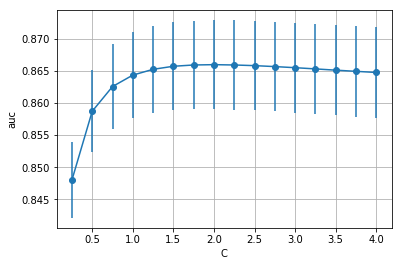

In [0]:
#finding mean value of auc across all the folds for all values of C 
auc_mean = np.mean(roc_auc, axis = 1)


#finding mean value of auc across all the folds for all values of C 
auc_se = np.std(roc_auc,axis=1)/np.sqrt(nfold-1)


plt.errorbar(C_test, auc_mean, marker='o',yerr=auc_se)

plt.grid()
plt.xlabel('C')
plt.ylabel('auc')

imax = np.argmax(auc_mean)

print("The maximum auc is: {}".format(auc_mean[imax]))
print("The C value corresponding to maximum auc = {}".format(C_test[imax]))



In [0]:
auc_opt = auc_mean[imax] - auc_se[imax]

I = np.where(auc_mean >= auc_opt)[0]
iopt = I[0]
Copt = C_test[iopt]
print("The optimal value of C using One SE rule is: {}".format(Copt))
print("Optimal AUC using One SE rule is: {}".format(auc_mean[iopt]))

The optimal value of C using One SE rule is: 0.75
Optimal AUC using One SE rule is: 0.8625716432684779


Now trying to perform TruncatedSVD on the data and then apply logistic regression. Since we have done One hot encoding, the data matrix is sparse and we cannot perform PCA on sparse matrix, hence using TruncatedSVD.

In [0]:
# scaling
scaling = StandardScaler(with_mean= False)
scaling.fit(X)
Xs = scaling.transform(X)

In [0]:
# performing TruncatedSVD on One hot encoded data.
ncomp = 2
trunk = TruncatedSVD(n_components= ncomp)
trunk.fit(Xs)
Z = trunk.transform(Xs)



Now trying to scatter plot the different classes of the transformed data. Once scattered we can see that the input data is really skewed i.e; the data examples of class 1 are way more than the data examples of class 0. Since data is skewed the metric accuracy will mislead us, Hence we used AUC to measure the performance.

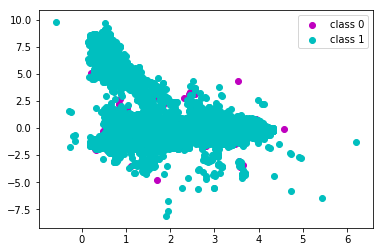

In [0]:
nc = 2
color = ['m', 'c']
classn = ['class 0','class 1']
for i in range(nc):
    I = np.where(y == i)
    plt.scatter(Z[I,0],Z[I,1],c =color[i])
plt.legend(classn)

Performing Scaling and TruncatedSVD on  cross validation data Xtr and Xts otained using train_test_split above. 

In [0]:

#Scaling
scaling = StandardScaler(with_mean= False)
scaling.fit(Xtr)
Xtr1 = scaling.transform(Xtr)

# applying TruncatedSVD
ncomp = 2
trunk = TruncatedSVD(n_components= ncomp)
trunk.fit(Xtr1)
Ztr = trunk.transform(Xtr1)

Xts1 = scaling.transform(Xts)
Zts = trunk.transform(Xts1)


Now using the above Transformed data and the best value of C we received from above Kfold validation we are building the model and then predicting the output labels.

In [0]:
#Building model using logistic regression linear classifier
model1 = LogisticRegression(C = 0.75)

# fitting model on the training samples of one hot encoded data.
model1.fit(Ztr,ytr)

#predicting probability of the output, so that we can measure auc.
ypred = model1.predict_proba(Zts)[:, 1]

fpr, tpr, thresholds = roc_curve(yts, ypred)
roc_auc1 = auc(fpr, tpr)

print("AUC value after tranformation using cross validation is : {}".format(roc_auc1))

AUC value after tranformation using cross validation is : 0.5194549228502726


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**we can see above that the auc has dropped to 0.52 from 0.87. We think that this is because of skewed data. Since the data is skewed we think that reducing the number of features and then predicting the labels is not a good option because it is giving us bad result. This is the reason why we chose to do One Hot Encoding, because we were getting some what similar auc of 0.48 without One Hot encoding as well. Therefore, we are not going to use PCA or TruncatedSVD for further models. **

Now using SVM on non-transformed data for prediction.

In [0]:
#Building model using svm.SVC linear classifier with some random parameters.
svm = SVC(probability= True,kernel="linear", C=3.0, gamma=0.01,verbose=10)

# fitting model on the training samples of one hot encoded data.
svm.fit(Xtr,ytr)

#predicting probability of the output on the test samples of one hot encoded data, so that we can measure auc.
yhatpr = svm.predict_proba(Xts)[:, 1]

fpr, tpr, thresholds = roc_curve(yts, yhatpr)
roc_auc2 = auc(fpr, tpr)

print("AUC value using svm.SVC model is : {}".format(roc_auc2))



[LibSVM]AUC value using svm.SVC model is : 0.8515017060710508


Since the dataset after One Hot Encoding is large, it is taking a lot of time for svm.SVC classifier to predict the labels. Therefore we decided to use GridSearchCV for cross validation as we have done in lab 11. Please do not run the below 3 code cells belonging to GridSearchCv because it is taking approximately 90 minutes to run the GridSearchCV.fit method by using GPU provided by google colab. Instead, We have run them and  we will update the performance value and best parameters we got in the text cell below the .fit method code cell. We have also taken the screen shot of the outputs of the GridSearchCV  estimator which we will post in github.

In [0]:
k=['linear']
c = [1e-2,1e-1,1e-0,1e1,2]
g = [1e-3,1e-2,1e-1,1e-0]
param_grid=dict(kernel=k, C=c, gamma=g)

In [0]:
estimator = GridSearchCV(SVC(),param_grid, cv= 5,scoring='roc_auc')#,return_train_score= True, iid= False)
estimator.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear'], 'C': [0.01, 0.1, 1.0, 10.0, 2], 'gamma': [0.001, 0.01, 0.1, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

The above GridSearchCV.fit is taking approximately 90 minutes to run, so instead of you running this part of the code, we have run it and recorded below the best score and best_parameters we received, they are:

best score(auc): 0.835598640
best parameters: C=2 , gamma=0.001.

In [0]:
print(estimator.best_score_)
print(estimator.best_params_)

0.8355986402665114
{'C': 2, 'gamma': 0.001, 'kernel': 'linear'}


So, using GridSearchCV with estimator: svm.SVC() and the list of parameters stated above, we found that the best auc was 0.835598640 for parameters C=2 and Gamma = 0.001. But we even received an auc= 0.8515 for C= 3 and gamma= 0.01 present in code cell above GridSearchCV estimation. In any case the AUC we got using SVM on all the possible combinations of parameters we have used is less than what we got using Logistic regression. Hence, we believe Logistic regression is a better linear classifier than svm.SVC for this dataset.

**Now we will use Random Forest classifier for classification and see the performance. Since we found Logistic regression is better than svm.SVC, we will only compare the performance of Random Forest classifier with Logistic regression and then finalize the final classifier which we think is better. **

In [0]:
#Building model using RandomForest classifier:

rfc = RandomForestClassifier(n_estimators= 1000, max_depth= 10)

# fitting model on the training samples of one hot encoded data.
rfc.fit(Xtr,ytr)

#predicting probability of the output, so that we can measure auc.
yhatprob1 = rfc.predict_proba(Xts)[:, 1]

fpr, tpr, thresholds = roc_curve(yts, yhatprob1)
roc_auc3 = auc(fpr, tpr)

print("AUC value using Random Forest classifier is : {}".format(roc_auc3))



AUC value using Random Forest classifier is : 0.8038823287047536


Now we will use GridSearchCV for doing cross validation on the below list of parameters using RandomForest, find the best auc and its respective parameters.

In [0]:
#creating the list of parameters we would like to use.
n_est = [100,200,300,500,750,1000,2000,3000]
max_dep = [3,4,5,8,10,15]
param_grid1=dict(n_estimators=n_est, max_depth=max_dep)

In [0]:
estimator1 = GridSearchCV(RandomForestClassifier(),param_grid1, cv= 5,scoring='roc_auc')
estimator1.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 500, 750, 1000, 2000, 3000], 'max_depth': [3, 4, 5, 8, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

The above GridSearchCV.fit  using RandomForest classifier is also taking approximately 90 minutes to run, so instead of you running this part of the code, we have run it and recorded below the best score and best_parameters we got, they are:

best score (auc): 0.8226450
best parameters: max_depth= 15, n_estimators=1000


In [0]:
print(estimator1.best_score_)
print(estimator1.best_params_)

0.8226450415779546
{'max_depth': 15, 'n_estimators': 1000}


So, using GridSearchCV with estimator: RandomForestClassifier() and the list of parameters stated above, we found that the best auc was 0.8226450 for parameters max_depth= 15, n_estimators=1000. Even using RandomForestClassifier(), the AUC we got on all the possible combinations of parameters we have used is less than what we got using Logistic regression. Hence, we believe Logistic regression is a better classifier than svm.SVC and RandomForest for this dataset. 

**Now finally we select logistic regression as classifier as it performed the best among all the classifiers we have used. Using Logistic regression classifier we predict the model one last time using best parameter C = 0.75 we got using k-fold validation for Logistic regression.**

In [0]:
#Building model using logistic regression linear classifier
model_final = LogisticRegression(C = 0.75)

# fitting model on the training samples of one hot encoded data.
model_final.fit(Xtr,ytr)

#predicting target labels
yhat = model_final.predict(Xts)

#predicting probability of the output, so that we can measure auc.
yhatpro = model_final.predict_proba(Xts)[:, 1]

fpr, tpr, thresholds = roc_curve(yts, yhatpro)
roc_auc_final = auc(fpr, tpr)

print("Final selected model AUC value using cross validation is : {}".format(roc_auc_final))



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC value using cross validation is : 0.8814830267137315


Finally, the best AUC value we received for the One Hot encoded input data is 0.8814830 using LogisticRegression( ) classifier with the value of C = 0.75.



Below we will display the ROC curve of the data which we get using fpr and tpr.

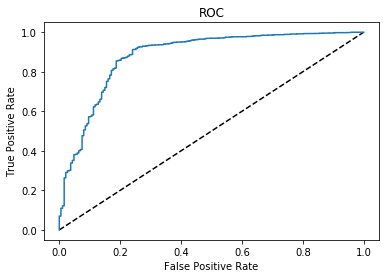

In [0]:
# Plotting ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()




Now we will display the confusion_matrix of our finally used prediction as well display the classification report.

In [0]:
cm = confusion_matrix(yts,yhat)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(yts,yhat))

Confusion matrix: 
 [[  25  162]
 [  15 3074]]
Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.13      0.22       187
           1       0.95      1.00      0.97      3089

   micro avg       0.95      0.95      0.95      3276
   macro avg       0.79      0.56      0.60      3276
weighted avg       0.93      0.95      0.93      3276



From above report as well we can see how skewed the data is. The test data contains 3089 samples belonging to class 1, but only 187 samples for class 0.


Below we plot the heatmap of confusion matrix.

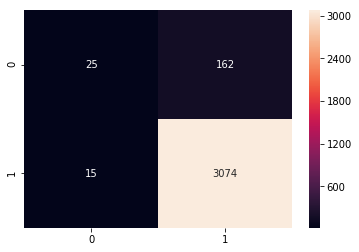

In [0]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

Therefore, the final model we select is:

classifier: LogisticRegression()
parameters: C=0.75